In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline

In [2]:
reviews = pd.read_csv('data/raw_reviews.csv', header=0, usecols=['reting','date', 'comment'], encoding='utf-8')

In [3]:
reviews.head()

,reting,date,comment
0,2.0,2013-06-28,"2,5 года работала и все...устала! Лампочка гор..."
1,2.0,2010-07-04,Через 2 месяца после истечении гарантийного ср...
2,4.0,2010-05-27,пользуюсь уже три недели. нареканий ни каких н...
3,5.0,2016-10-11,Ребят этот системный блок подойдёт для игры кс...
4,5.0,2010-02-26,"я считаю, что яри замечательный телефон! Прият..."


In [4]:
reviews.shape

(15587, 3)

In [5]:
reviews = reviews[~reviews.comment.duplicated()]
reviews.shape

(15513, 3)

In [6]:
reviews.reting.value_counts()

5.0    9189
4.0    2606
1.0    1440
3.0    1240
2.0     850
4.7      76
4.3      51
3.3      15
3.7      14
2.7      14
2.3      12
1.3       5
1.7       1
Name: reting, dtype: int64

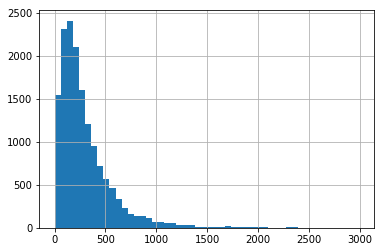

In [7]:
reviews[reviews.comment.apply(len) < 3000].comment.apply(len).hist(bins=50)

In [8]:
# reviews = reviews[reviews.comment.apply(len) < 500]

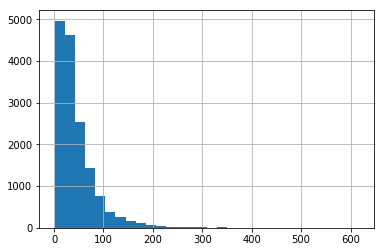

In [9]:
reviews.comment.apply(lambda s: len(s.split())).hist(bins=30)

In [10]:
reviews.shape

(15513, 3)

In [11]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = train_test_split(reviews.comment, reviews.reting,
                                                    test_size=TEST_SIZE, random_state=42)

In [12]:
reviews_train = pd.DataFrame(X_train)
reviews_train['reting'] = y_train

reviews_test = pd.DataFrame(X_test)
reviews_test['reting'] = y_test

In [13]:
reviews_train.to_csv('data/reviews_train.csv', index=False, encoding='utf-8')
reviews_test.to_csv('data/reviews_test.csv', index=False, encoding='utf-8')

### Analyzing words in train set

In [14]:
from sentence_processor import SentenceProcessor

C:\Users\miair\Anaconda3\envs\tensorflow\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [16]:
DIR = 'data/w2v_models/'
MODEL_NAME = 'all.norm-sz100-w10-cb0-it1-min100.w2v'

w2v_path = DIR + MODEL_NAME
sentence_processor = SentenceProcessor(w2v_path)

In [26]:
from tqdm import tqdm_notebook

# creating a dictionary of words with frequency counting
dictionary = {}

for comment in tqdm_notebook(reviews_train.comment):
    bag_of_words = sentence_processor.process(comment)
    for word in bag_of_words:
        dictionary.setdefault(word, 0)
        dictionary[word] += 1

In [35]:
garbage_list = []
for word, value in dictionary.items():
    if value > 1500:
        print ('{} -> {}'.format(word, value))
        garbage_list.append(word)

я -> 5710
большой -> 1647
по -> 3259
купить -> 3718
этот -> 3141
на -> 10005
один -> 2453
так -> 2560
только -> 2188
из -> 2163
хороший -> 3265
как -> 3268
отличный -> 1959
что -> 6567
это -> 4617
и -> 17606
за -> 2879
у -> 2853
в -> 14177
если -> 1929
с -> 6425
очень -> 5916
нет -> 1758
же -> 1516
он -> 3821
при -> 2485
для -> 3728
пользоваться -> 1936
быть -> 3603
а -> 3961
просто -> 1838
раз -> 1609
работать -> 2387
но -> 5147
качество -> 1663
довольный -> 1859
к -> 2016
весь -> 5580
не -> 16416
можно -> 1522
есть -> 1791
цена -> 1504
от -> 1789
уже -> 1711
такой -> 2453
она -> 1932
год -> 3236
то -> 2997


In [40]:
print (garbage_list)

['я', 'большой', 'по', 'купить', 'этот', 'на', 'один', 'так', 'только', 'из', 'хороший', 'как', 'отличный', 'что', 'это', 'и', 'за', 'у', 'в', 'если', 'с', 'очень', 'нет', 'же', 'он', 'при', 'для', 'пользоваться', 'быть', 'а', 'просто', 'раз', 'работать', 'но', 'качество', 'к', 'весь', 'не', 'можно', 'есть', 'цена', 'от', 'уже', 'такой', 'она', 'год', 'то']
